<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

In [2]:
import numpy as np
from matplotlib import pyplot as plt

### 1.1 Real and Pseudo Random Numbers

### 1.2 NumPy’s PRNG

In [10]:
np.random.rand()                # Give one number


0.7199913854839666

In [11]:
np.random.rand(10)              # Give ten numbers`


array([0.62627127, 0.1074739 , 0.55964368, 0.11457909, 0.29196584,
       0.04035121, 0.95350945, 0.00843895, 0.901016  , 0.37477693])

In [12]:
np.random.rand(5,2)             # Give five sets of 2

array([[0.47668445, 0.96359862],
       [0.77880707, 0.76181998],
       [0.7128308 , 0.37768579],
       [0.46034081, 0.59336277],
       [0.91126801, 0.19867561]])

In [13]:
n = 10000
random_numbers = np.random.rand(n)

In [14]:
# The numbers less than .5 must be about 50%
np.sum(random_numbers < .5) / n * 100

50.129999999999995

In [15]:
# The numbers less than .25 must be about 25%
np.sum(random_numbers < .25) / n * 100

24.91

In [16]:
# The numbers more than .75 must be about 25%
np.sum(random_numbers > .75) / n * 100

25.15

### 1.3 A simple graphical test

Text(0, 0.5, 'Value of random number')

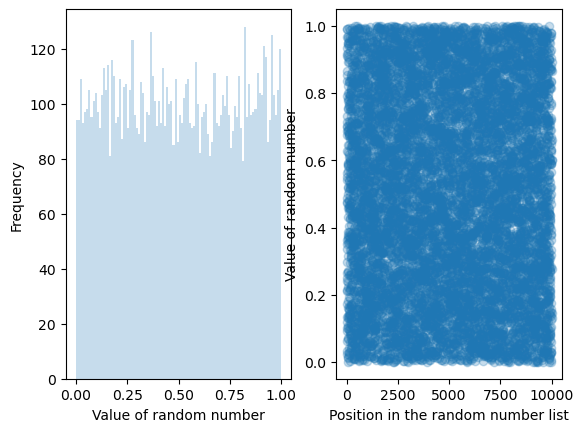

In [17]:
n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.4 Uniformly beyond \([0,1)\)

Text(0, 0.5, 'Value of random number')

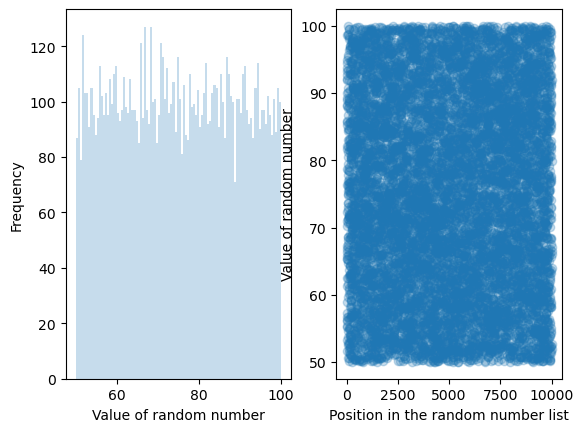

In [18]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)
# specify the value of random number

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.5 ‘seeding’ a PRNG

In [19]:
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([30,  7, 73, 36,  5, 42, 41, 72, 39, 90])

In [20]:
np.random.randint(0, 100, 10)     # Another ten integers between 0 and 100

array([72, 78, 82, 67, 50, 64, 38, 78, 22, 75])

In [21]:
np.random.seed(12)              # Specifying a seed
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([75, 27,  6,  2,  3, 67, 76, 48, 22, 49])

In [22]:
np.random.seed(12)
np.random.randint(0, 100, 10)     # Same ten integers between 0 and 100

array([75, 27,  6,  2,  3, 67, 76, 48, 22, 49])

## 2 Simulating a Magic-8 Ball

In [23]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)

In [24]:
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: As I see it, yes.

Q: Will I be rich?
A: Cannot predict now.

Q: Will I be in trouble?
A: Without a doubt.



## 3 Flipping Coins

### 3.1 A fair coin

In [25]:
np.random.choice(['Head', 'Tails'])


'Tails'

In [26]:
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Head', 'Head', 'Head', 'Tails', 'Head', 'Head', 'Tails', 'Head',
       'Tails', 'Tails'], dtype='<U5')

In [27]:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

In [28]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 51.80%


### 3.2 A biased coin

In [29]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')


Number of heads: 68.10%


### 3.3 A flipping experiment

In [30]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)
heads_probability = heads_counts/no_of_repeats

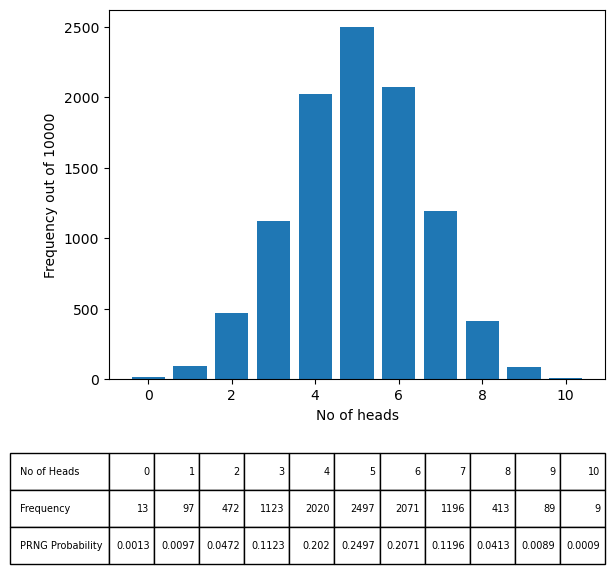

In [31]:
# plt.rcParam['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

In [32]:
from scipy.stats import binom

In [33]:
binom.pmf(k=7, n=10, p=.5)

0.11718749999999996

In [34]:
binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)

## Exercise 1 :  12C, 13C

In [53]:
def cholesm(n): 
    cholesc13 = []
    for i in range(n):
        carbon = np.random.rand(27)   
        c13 = carbon > 0.9889
        cholesc13.append(np.sum(carbon[c13]))
    return cholesc13

repeat = 10000
test = cholesm(repeat)
print(f'mean = {np.mean(test)}')
print(f'standard deviation = {np.std(test)}')  

mean = 0.3018292182745645
standard deviation = 0.5447248515797777
probability = 0.3014184387212451


In [88]:
def cholesm(carbons=27, probability=.9889): 
    results = np.random.rand(carbons)
    c13 = np.sum(results > probability)
    return c13

no_of_repeats = 10_000
result = [cholesm() for a in range(no_of_repeats)]
print(f'mean = {np.mean(result)}')
print(f'standard deviation = {np.std(result)}')  


mean = 0.3163
standard deviation = 0.5589761265027335


probability of 0 13C carbon is 0.7272


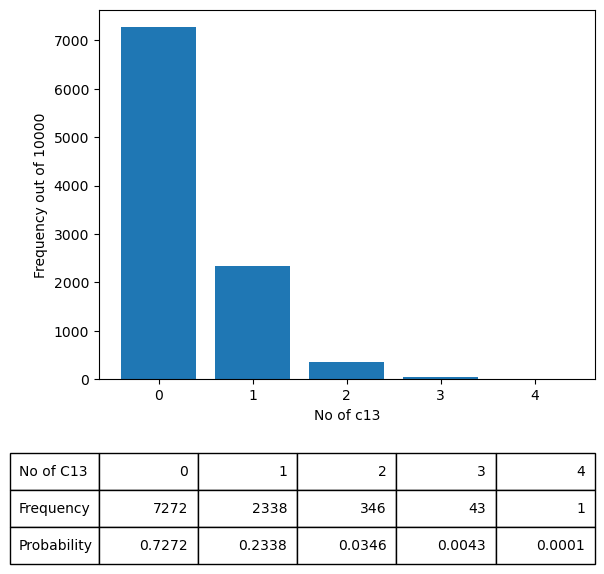

In [89]:
c13, c13_counts = np.unique(result, return_counts=True)

c13_probability = c13_counts/no_of_repeats
print(f'probability of 0 13C carbon is {c13_probability[0]}')

plt.bar(c13, c13_counts);
plt.xlabel('No of c13')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([c13, c13_counts, c13_probability],
          rowLabels=['No of C13', 'Frequency', 'Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])
